## Author: Suraj Kumar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv("BSESN .csv")

### Exploring stock prices dataset

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-18,25764.669922,25789.509766,25481.509766,25519.220703,25519.220703,10400.0
1,2015-12-21,25425.320313,25757.839844,25413.539063,25735.900391,25735.900391,8100.0
2,2015-12-22,25731.070313,25787.210938,25485.169922,25590.650391,25590.650391,8100.0
3,2015-12-23,25697.660156,25875.269531,25689.699219,25850.300781,25850.300781,6900.0
4,2015-12-24,25893.839844,25922.470703,25763.400391,25838.710938,25838.710938,4900.0


In [5]:
dataset.shape

(1213, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1213 non-null   object 
 1   Open       1208 non-null   float64
 2   High       1208 non-null   float64
 3   Low        1208 non-null   float64
 4   Close      1208 non-null   float64
 5   Adj Close  1208 non-null   float64
 6   Volume     1208 non-null   float64
dtypes: float64(6), object(1)
memory usage: 66.5+ KB


In [7]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1.208000e+03
mean,33483.587574,33640.839367,33249.803355,33438.469790,33438.469790,2.781658e+05
std,4993.835438,5002.938660,4963.947563,4981.579833,4981.579833,2.141879e+06
min,23060.390625,23142.960938,22494.609375,22951.830078,22951.830078,2.500000e+03
25%,28929.013184,29075.022949,28777.002930,28920.254394,28920.254394,1.050000e+04
50%,34061.904297,34301.853515,33844.580079,34062.113282,34062.113282,1.420000e+04
75%,37719.909180,37880.633789,37419.791016,37649.505860,37649.505860,1.980000e+04
max,44095.851563,44161.160156,43699.218750,43952.710938,43952.710938,3.181510e+07


### Checking for NULL values

In [8]:
dataset.isnull().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [10]:
dataset.dropna(inplace=True)
dataset.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

### Visualzing the dataset

<AxesSubplot:xlabel='Date', ylabel='Open'>

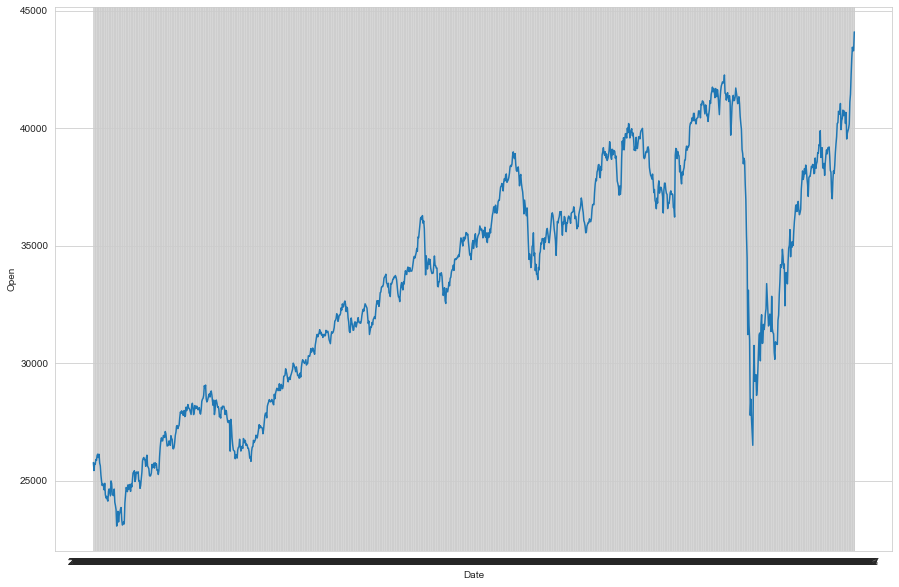

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.lineplot(x=dataset['Date'],y=dataset['Open'],data=dataset)

In [12]:
##dataset["Date"] extends from Dec'15 to Nov'20

0       2015-12-18
1       2015-12-21
2       2015-12-22
3       2015-12-23
4       2015-12-24
           ...    
1207    2020-11-10
1208    2020-11-11
1209    2020-11-12
1210    2020-11-13
1212    2020-11-17
Name: Date, Length: 1208, dtype: object

In [13]:
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

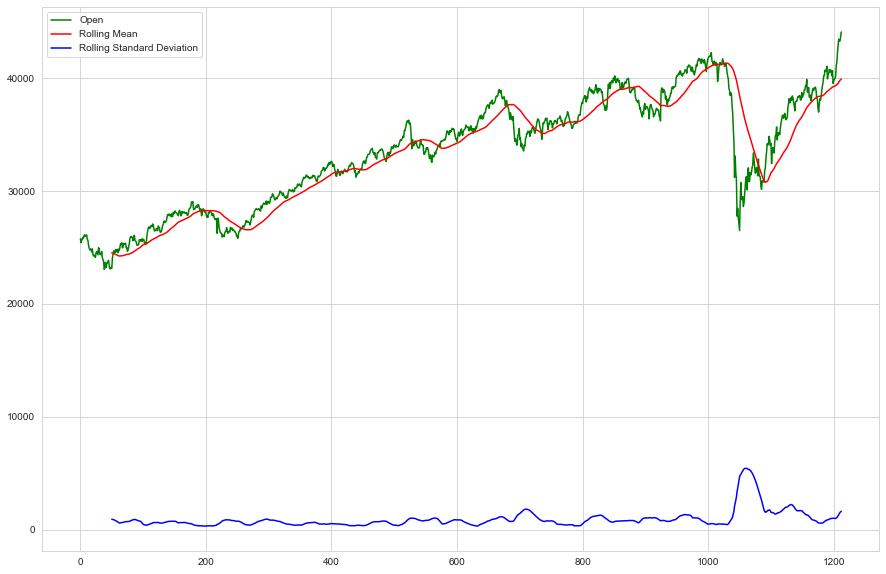

In [14]:
#Plotting moving average
Open = dataset['Open']
ma = Open.rolling(window = 50).mean()
std = Open.rolling(window = 50).std()

plt.figure(figsize=(15,10))
dataset['Open'].plot(color = 'g', label = 'Open')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(color = 'b',label = 'Rolling Standard Deviation')
plt.legend()

In [15]:
train = dataset[:1000]
test = dataset[1000:]

### Checking stationarity of dataset

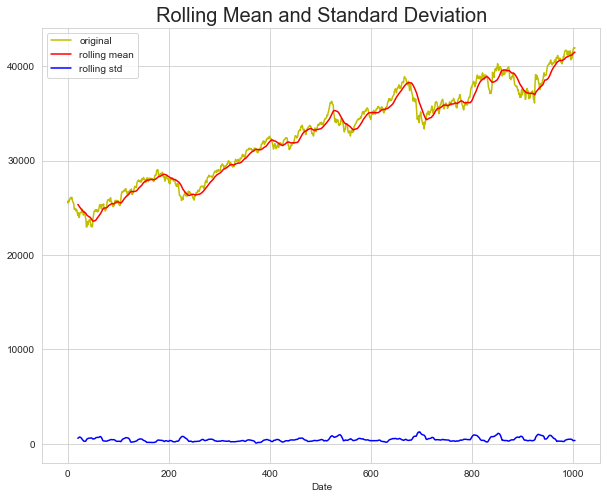

Results of dickey fuller test
ADF Test Statistic : -0.4949688010561845
p-value : 0.8929945675242204
#Lags Used : 1
Number of Observations Used : 998
Weak evidence against null hypothesis, time series is non-stationary 


In [16]:
def test_stationarity(timeseries):

 #Determing rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (10,8))
 plt.plot(timeseries, color = 'y', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'b', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

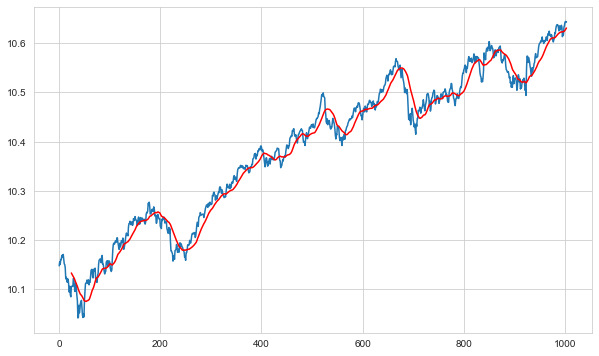

In [17]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

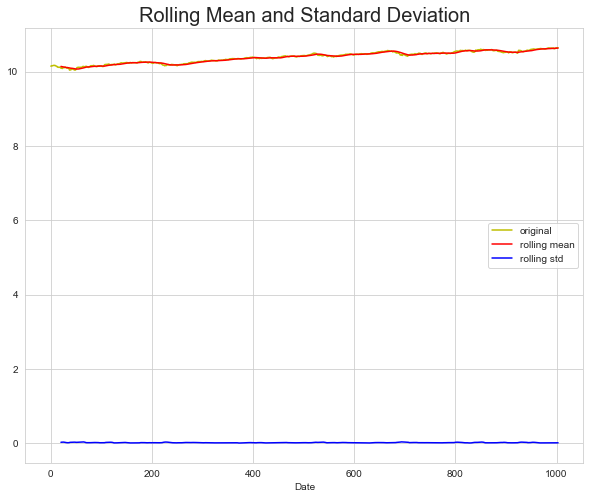

Results of dickey fuller test
ADF Test Statistic : -0.7070215599805354
p-value : 0.8449224026674627
#Lags Used : 1
Number of Observations Used : 998
Weak evidence against null hypothesis, time series is non-stationary 


In [18]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

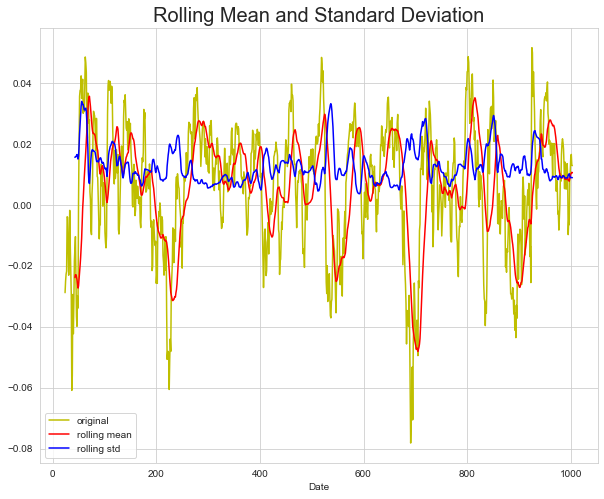

Results of dickey fuller test
ADF Test Statistic : -6.7447842176015875
p-value : 3.054517163677623e-09
#Lags Used : 2
Number of Observations Used : 974
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [19]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [ ]:
!pip install pmdarima

## Making Predictions using pmdarima

In [23]:
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6801.115, Time=4.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6804.734, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6805.871, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6805.785, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6802.896, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6803.993, Time=0.77 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6803.944, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6801.707, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6804.445, Time=0.26 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 8.814 seconds


Text(0, 0.5, 'Actual Stock Price')

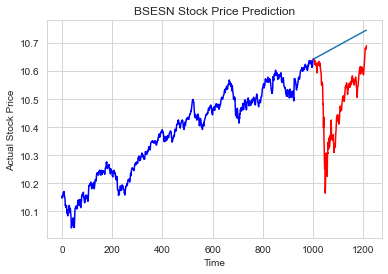

In [26]:
plt.plot(train_log, label='Train',color = 'b')
plt.plot(test_log, label='Test',color = 'r')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

### Calculating error

In [28]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.22126002334475034


## Making Predictions using LSTM

In [100]:
training_set = dataset[:1140].iloc[:,1:2].values

In [101]:
training_set.shape

(1140, 1)

In [102]:
## Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [105]:
## Creating a data structure with ~60 time steps and 1 output

X_train = []
y_train = []
for i in range(60,1140):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [106]:
print(X_train.shape,y_train.shape)

(1080, 60) (1080,)


In [107]:
## Reshaping the dataset
# refer keras documentation->recurrent layers
# no of stock prices, no of timesteps, no of indicators
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [108]:
X_train.shape

(1080, 60, 1)

### Building and training the RNN model

In [109]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [110]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#Initializing the RNN
regressor = Sequential()
#Adding the first LSTM layer and some Droput regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1))) #input_shape=last 2 of x_train
regressor.add(Dropout(0.2))

In [111]:
#Adding a second LSTM layer and some Droput regularization
regressor.add(LSTM(units=50, return_sequences=True)) #units=no. of neurons in this layer
regressor.add(Dropout(0.2))

#Adding a third LSTM layer and some Droput regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [112]:
#Adding a fourth LSTM layer and some Droput regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units=1))

In [113]:
#Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [114]:
#Fitting the RNN to the training set
regressor.fit(x=X_train, y=y_train, batch_size=32 , epochs=50 )

Epoch 1/50
34/34 [==============================] - 9s 63ms/step - loss: 0.0905
Epoch 2/50
34/34 [==============================] - 2s 64ms/step - loss: 0.0117
Epoch 3/50
34/34 [==============================] - 2s 69ms/step - loss: 0.0100
Epoch 4/50
34/34 [==============================] - 2s 64ms/step - loss: 0.0105
Epoch 5/50
34/34 [==============================] - 2s 68ms/step - loss: 0.0070
Epoch 6/50
34/34 [==============================] - 2s 64ms/step - loss: 0.0090
Epoch 7/50
34/34 [==============================] - 2s 69ms/step - loss: 0.0072
Epoch 8/50
34/34 [==============================] - 2s 67ms/step - loss: 0.0074
Epoch 9/50
34/34 [==============================] - 2s 64ms/step - loss: 0.0057
Epoch 10/50
34/34 [==============================] - 2s 71ms/step - loss: 0.0056
Epoch 11/50
34/34 [==============================] - 2s 62ms/step - loss: 0.0062
Epoch 12/50
34/34 [==============================] - 2s 63ms/step - loss: 0.0052
Epoch 13/50
34/34 [==================

In [115]:
dataset_test = dataset[-20:-1]

In [116]:
##Making the predictions and visualizing the results
real_stock_price = dataset_test.iloc[:, 1:2].values

In [117]:
dataset_total = pd.concat((dataset['Open'],dataset['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60: ].values

In [118]:
inputs.shape

(79,)

In [119]:
inputs = inputs.reshape(-1,1)
#In order to convert into 3D shape, it's needed
inputs.shape

(79, 1)

In [120]:
##Scaling the input
inputs = sc.transform(inputs)

#Convert into 3D format
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [121]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [122]:
predicted_stock_price.shape

(20, 1)

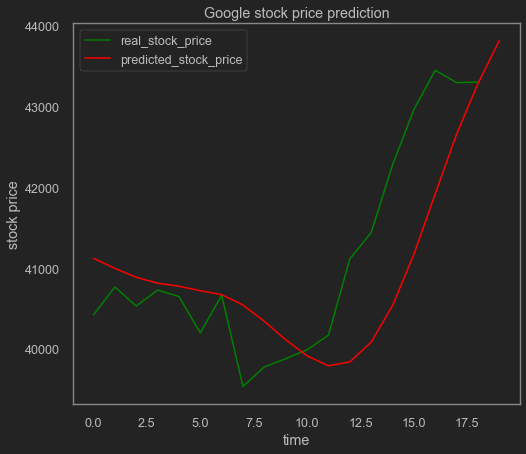

In [123]:
plt.plot(real_stock_price,color='green',label='real_stock_price')
plt.plot(predicted_stock_price,color='red',label='predicted_stock_price')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('Google stock price prediction')
plt.legend()

#### LSTM model provided a decent approximation

# Textual Analysis

In [ ]:
dataset_news = pd.read_csv('india-news-headlines.csv')
dataset_news

In [ ]:
!pip install textblob

In [142]:
import nltk
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
import lightgbm

In [143]:
dataset_news.columns = ['Date', 'Category', 'News']

In [ ]:
dataset_news.drop('Category',inplace=True,axis=1)

### Changing Date type to proper format

In [158]:
dataset_news['Date'] = pd.to_datetime(dataset_news['Date'],format= '%Y%m%d')

In [159]:
dataset_news

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
...,...,...
3297167,2020-06-30,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,meezaan jaffrey reminisces his childhood days ...


## Grouping news headlines together

In [160]:
dataset_news['News'] = dataset_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 

In [164]:
dataset_news = dataset_news.drop_duplicates() 

In [165]:
dataset_news

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
87,2001-01-03,Powerless north India gropes in the dark Think...
128,2001-01-04,The string that pulled Stephen Hawking to Indi...
281,2001-01-05,Light combat craft takes India into club class...
...,...,...
3294593,2020-06-26,Containment zone residents slam high prices ch...
3295093,2020-06-27,like me i wont let you have a toxic relationsh...
3295620,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
3296120,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [166]:
dataset_news.reset_index(inplace = True, drop = True)
dataset_news

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [169]:
dataset_news.News[1]

"Status quo will not be disturbed at Ayodhya; says Vajpayee Fissures in Hurriyat over Pak visit America's unwanted heading for India? For bigwigs; it is destination Goa Extra buses to clear tourist traffic Dilute the power of transfers; says Riberio Focus shifts to teaching of Hindi IT will become compulsory in schools Move to stop freedom fighters' pension flayed Gilani claims he applied for passport 2 years ago Parivar dismisses PM's warning India; Pak exchange lists of N-plants Will Qureshi's return really help the govt? PM's tacit message: Put Ram tample on hold Text of the Prime Minister's article NCW to focus on violence against women BBC's reality TV will focus on AIIMS Jaitley firm on legal reforms Hoshangabad farmers have enough water BJP jumps into rail track conversion issue America's unwanted heading for India? State may take AP to court over Krishna This official has sued the briber Park turns temple compound as residents watch Moves afoot to evict squatters in Urban dist 

### Plotting wordcloud

In [ ]:
!pip install WordCloud

In [171]:
sentences = dataset_news['News'].tolist()
type(sentences)

list

In [172]:
sentences_as_one_string = " ".join(sentences)
type(sentences_as_one_string)


str

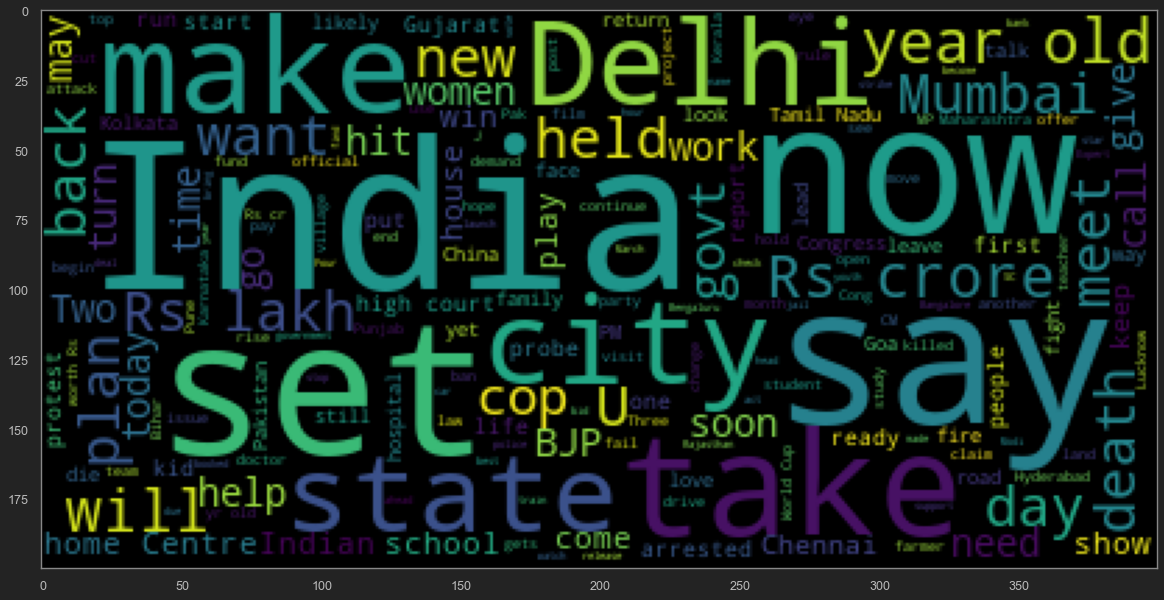

In [173]:
from wordcloud import WordCloud

plt.figure(figsize=(20,15))
plt.imshow(WordCloud().generate(sentences_as_one_string))

### Data Cleaning steps - removing punctuations and stopwords & stemming with PorterStemmer

In [ ]:
nltk.download('stopwords')

In [181]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords

In [208]:
temp_list = []
for i in range(len(dataset_news['News'])):
    one_news = re.sub('[^a-zA-Z]',' ',dataset_news['News'][i])
    one_news = one_news.lower()
    one_news = one_news.split()
    one_news = [ps.stem(word) for word in one_news if not word in set(stopwords.words('english'))]
    one_news=' '.join(one_news)
    temp_list.append(one_news)

In [213]:
temp_list[0][0:200]

'learn go flow yuvraj yusuf fashion india win west indi feel lot stronger say yuvraj singh southern shock srinivasan learn go flow sehwag reinvent middl order get valid visa faisalabad wolv pca shikhar'

In [218]:
dataset_news['News'] = pd.Series(temp_list)
dataset_news

,Date,News
0,2013-09-16,learn go flow yuvraj yusuf fashion india win w...
1,2013-09-17,ganeshotsav special recip papaya halwa use eco...
2,2013-09-18,bhiwadi see per cent appreci properti valu man...
3,2013-09-19,love enough last relationship send accident te...
4,2013-09-20,world top leader topless war shadow evil celeb...
...,...,...
2475,2020-06-26,contain zone resid slam high price charg veget...
2476,2020-06-27,like wont let toxic relationship food major ra...
2477,2020-06-28,atanu ghosh plan rewrit old script make relev ...
2478,2020-06-29,hot stylish bikini look katrina kaif anna eden...


### Sentiment Analysis

In [220]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [221]:
dataset_news['Subjectivity'] = dataset_news['News'].apply(getSubjectivity)
dataset_news['Polarity'] = dataset_news['News'].apply(getPolarity)
dataset_news

,Date,News,Subjectivity,Polarity
0,2013-09-16,learn go flow yuvraj yusuf fashion india win w...,0.397365,0.084722
1,2013-09-17,ganeshotsav special recip papaya halwa use eco...,0.344150,0.044378
2,2013-09-18,bhiwadi see per cent appreci properti valu man...,0.345841,0.064664
3,2013-09-19,love enough last relationship send accident te...,0.404674,0.116956
4,2013-09-20,world top leader topless war shadow evil celeb...,0.386425,0.059686
...,...,...,...,...
2475,2020-06-26,contain zone resid slam high price charg veget...,0.330257,0.066958
2476,2020-06-27,like wont let toxic relationship food major ra...,0.372264,0.064784
2477,2020-06-28,atanu ghosh plan rewrit old script make relev ...,0.378165,0.054209
2478,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782


In [ ]:
!pip install vaderSentiment

In [228]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Suraj
[nltk_data]     Kumar\AppData\Roaming\nltk_data...


True

In [226]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [229]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

dataset_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in dataset_news['News']]
dataset_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in dataset_news['News']]
dataset_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in dataset_news['News']]
dataset_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in dataset_news['News']]
dataset_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2013-09-16,learn go flow yuvraj yusuf fashion india win w...,0.397365,0.084722,-0.9995,0.138,0.760,0.101
1,2013-09-17,ganeshotsav special recip papaya halwa use eco...,0.344150,0.044378,-0.9998,0.149,0.762,0.089
2,2013-09-18,bhiwadi see per cent appreci properti valu man...,0.345841,0.064664,-0.9998,0.150,0.765,0.085
3,2013-09-19,love enough last relationship send accident te...,0.404674,0.116956,-0.9996,0.133,0.773,0.094
4,2013-09-20,world top leader topless war shadow evil celeb...,0.386425,0.059686,-0.9999,0.153,0.762,0.085
...,...,...,...,...,...,...,...,...
2475,2020-06-26,contain zone resid slam high price charg veget...,0.330257,0.066958,-0.9998,0.142,0.789,0.069
2476,2020-06-27,like wont let toxic relationship food major ra...,0.372264,0.064784,-0.9998,0.139,0.790,0.070
2477,2020-06-28,atanu ghosh plan rewrit old script make relev ...,0.378165,0.054209,-0.9998,0.136,0.800,0.064
2478,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782,-0.9998,0.130,0.800,0.070


## Combining textual and historical data together with Pandas merge fn

In [ ]:
dataset_news['Date'] = pd.to_datetime(dataset_news['Date'])

In [239]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [240]:
dataset_merge = pd.merge(dataset, dataset_news, how='inner', on='Date')


In [241]:
df = dataset_merge[['Open','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Open,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,25764.669922,0.410943,0.076559,-0.9997,0.138,0.769,0.093
1,25425.320313,0.400018,0.054775,-0.9995,0.138,0.760,0.102
2,25731.070313,0.398132,0.085211,-0.9998,0.147,0.759,0.094
3,25697.660156,0.385927,0.056740,-0.9999,0.154,0.760,0.085
4,25893.839844,0.408109,0.070642,-0.9988,0.121,0.778,0.101
...,...,...,...,...,...,...,...
1105,35679.738281,0.368654,0.077799,-0.9997,0.126,0.807,0.067
1106,34525.390625,0.362784,0.011935,-0.9999,0.153,0.795,0.052
1107,35144.781250,0.330257,0.066958,-0.9998,0.142,0.789,0.069
1108,34926.949219,0.373210,0.060782,-0.9998,0.130,0.800,0.070


In [242]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))

In [243]:
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Open,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.140829,0.421959,0.281978,0.000153,0.509804,0.338983,0.5625
1,0.123157,0.373703,0.213641,0.000255,0.509804,0.262712,0.6750
2,0.139079,0.365372,0.309119,0.000102,0.598039,0.254237,0.5750
3,0.137339,0.311459,0.219805,0.000051,0.666667,0.262712,0.4625
4,0.147555,0.409441,0.263417,0.000612,0.343137,0.415254,0.6625


In [244]:
X = new_df.drop('Open', axis=1)
y =new_df['Open']

In [245]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.421959,0.281978,0.000153,0.509804,0.338983,0.5625
1,0.373703,0.213641,0.000255,0.509804,0.262712,0.6750
2,0.365372,0.309119,0.000102,0.598039,0.254237,0.5750
3,0.311459,0.219805,0.000051,0.666667,0.262712,0.4625
4,0.409441,0.263417,0.000612,0.343137,0.415254,0.6625


In [246]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

(888, 6)

In [248]:
print(x_train.shape, x_test.shape)

(888, 6) (222, 6)


## Applying Various Models

In [250]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [256]:

print("RandomForestRegressor: ",mean_squared_error(prediction,y_test))

RandomForestRegressor:  0.0385603625082234


In [253]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [257]:

print("AdaBoostRegressor: ",mean_squared_error(predictions, y_test))

AdaBoostRegressor:  0.045337192641716595


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [259]:

print("DecisionTreeRegressor: ",mean_squared_error(predictions,y_test))

DecisionTreeRegressor:  0.045337192641716595


In [277]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)
predictions = lgb.predict(x_test)

In [278]:

print("LGBMRegressor: ",mean_squared_error(predictions,y_test))

LGBMRegressor:  0.04379987998650786


In [279]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)

In [280]:

print("XGBRegressor: ",mean_squared_error(predictions,y_test))

XGBRegressor:  0.0506654459062905


####  We can observe that Random Forest Regressor performed better than others with lowest mean_squared_error.